In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
from datetime import datetime
from IPython.display import HTML
import netCDF4 as nc
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


### Import data

In [2]:
ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane_sss150/sscFromSSS150/fromsss150_25feb23/ariane_trajectories_qualitative.nc')
sss150 = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane_sss150/sss150_feb25/25feb23_lg_s1t14_maxebb9to11/ariane_trajectories_qualitative.nc')

TransitionData = np.loadtxt('/ocean/cstang/MOAD/analysis-camryn/OAE/Ariane/ExitandInitialConditions/TransitionData_25febMaxEbb.txt')
ExitLats = np.loadtxt('/ocean/cstang/MOAD/analysis-camryn/OAE/Ariane/ExitandInitialConditions/ExitLats_25febMaxEbb.txt')
ExitLons = np.loadtxt('/ocean/cstang/MOAD/analysis-camryn/OAE/Ariane/ExitandInitialConditions/ExitLons_25febMaxEbb.txt')

mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
ssc_mesh = xr.open_dataset('/ocean/mdunphy/sal500/mesh_mask201702MD_No_FR_Ext.nc')

In [3]:
date = '25feb23'
traj_file = f'/ocean/cstang/MOAD/analysis-camryn/Ariane_sss150/sss150_feb25/{date}_lg_s1t14p50_tidecycle9211/ariane_trajectories_qualitative.nc'

dataset = xr.open_dataset(traj_file)

In [5]:
PNum = np.array([int(num) for num in TransitionData[:,0]])
PNum_time = [int(num) for num in TransitionData[:,1]]

In [6]:
len(sss150.ntraj)

2000

In [7]:
TrajLonComb = np.zeros((len(ssc.nb_output),len(sss150.ntraj)))
TrajLatComb = np.zeros((len(ssc.nb_output),len(sss150.ntraj)))
TrajDepthComb = np.zeros((len(ssc.nb_output),len(sss150.ntraj)))

ssc_idx_map = {PNum[i]: i for i in range(len(PNum))}  # Map PNum values to ssc indices

for ii in range(1200):
    if ii in PNum:
        idx = np.where(PNum == ii)[0][0]
        TrajLonComb[:PNum_time[idx],ii] = sss150.traj_lon[:PNum_time[idx],PNum[idx]]
        TrajLatComb[:PNum_time[idx],ii] = sss150.traj_lat[:PNum_time[idx],PNum[idx]]
        TrajDepthComb[:PNum_time[idx],ii] = sss150.traj_depth[:PNum_time[idx],PNum[idx]]
        TrajLonComb[PNum_time[idx]:,ii] = ssc.traj_lon[:-PNum_time[idx],ssc_idx_map[ii]]
        TrajLatComb[PNum_time[idx]:,ii] = ssc.traj_lat[:-PNum_time[idx],ssc_idx_map[ii]]
        TrajDepthComb[PNum_time[idx]:,ii] = ssc.traj_depth[:-PNum_time[idx],ssc_idx_map[ii]]
    else:
        TrajLonComb[:337,ii] = sss150.traj_lon[:,ii]
        TrajLatComb[:337,ii] = sss150.traj_lat[:,ii]
        TrajDepthComb[:337,ii] = sss150.traj_depth[:,ii]
# for ii in range(len(PNum)):
#     sss150.traj_lon[:PNum_time[ii],PNum[ii]]

In [24]:
PNum_time

[289,
 192,
 101,
 110,
 100,
 99,
 110,
 103,
 109,
 210,
 193,
 124,
 87,
 90,
 160,
 89,
 135,
 100,
 108,
 110,
 115,
 276,
 116,
 128,
 83,
 99,
 282,
 107,
 267,
 114,
 258,
 293,
 304,
 225,
 196,
 261,
 110,
 112,
 105,
 186,
 86,
 108,
 109,
 315,
 110,
 169,
 112,
 102,
 277,
 135,
 111,
 111,
 99,
 298,
 178,
 194,
 249,
 287,
 250,
 80,
 84,
 85,
 102,
 84,
 111,
 97,
 83,
 135,
 106,
 90,
 185,
 304,
 226,
 221,
 111,
 134,
 101,
 100,
 110,
 110,
 90,
 110,
 115,
 107,
 275,
 177,
 105,
 84,
 84,
 85,
 103,
 148,
 103,
 187,
 104,
 121,
 118,
 115,
 278,
 87,
 85,
 105,
 107,
 306,
 115,
 117,
 106,
 277,
 268,
 103,
 132,
 276,
 111,
 205,
 128,
 92,
 110,
 101,
 183,
 83,
 85,
 102,
 88,
 104,
 100,
 270,
 321,
 193,
 320,
 307,
 134,
 173,
 279,
 104,
 90,
 125,
 83,
 103,
 176,
 84,
 101,
 91,
 87,
 110,
 104,
 110,
 125,
 304,
 97,
 81,
 89,
 185,
 205,
 100,
 100,
 110,
 100,
 106,
 282,
 105,
 131,
 104,
 111,
 112,
 108,
 110,
 97,
 105,
 112,
 105,
 85,
 109,
 10

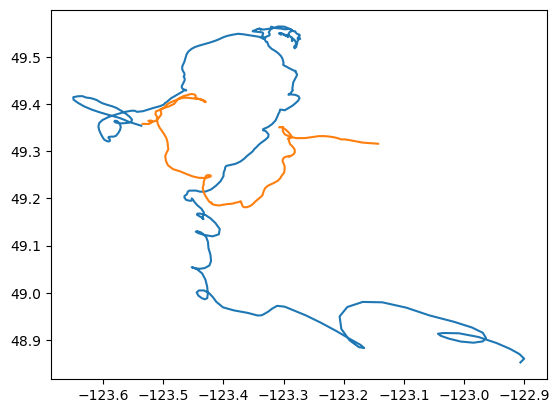

In [25]:
# plt.plot(ssc.traj_lon[:,0],ssc.traj_lat[:,0])
# plt.plot(sss150.traj_lon[:170,0],sss150.traj_lat[:170,0])
# plt.plot(TrajLonComb[:,0],TrajLatComb[:,0])
plt.plot(ssc.traj_lon[:,1],ssc.traj_lat[:,1])
plt.plot(sss150.traj_lon[:192+2,2],sss150.traj_lat[:192+2,2])
# plt.plot(dataset.traj_lon[:170,0],dataset.traj_lat[:170,0])
# plt.scatter(ssc.traj_lon[0,0],ssc.traj_lat[0,0])

# plt.scatter(mesh.nav_lon[11,153].values,mesh.nav_lat[11,153].values)
# plt.scatter(ssc_mesh.nav_lon[406,279].values,ssc_mesh.nav_lat[406,279].values)
# plt.scatter(ExitLons[0],ExitLats[0])

In [18]:
ssc.traj_lon[:,1].values

array([-123.53654941, -123.54761826, -123.55712911, -123.56483588,
       -123.57318705, -123.58266817, -123.59305643, -123.60522247,
       -123.61861011, -123.63165039, -123.64229785, -123.6492313 ,
       -123.64963674, -123.6421387 , -123.63452347, -123.62811536,
       -123.62249442, -123.61753133, -123.61363456, -123.61079359,
       -123.60832778, -123.60550227, -123.60335179, -123.60033571,
       -123.59372141, -123.58485003, -123.57790099, -123.57303038,
       -123.56711166, -123.5611595 , -123.55560354, -123.55200078,
       -123.5529624 , -123.55738404, -123.56444297, -123.57165045,
       -123.57818811, -123.58140084, -123.5803369 , -123.57658481,
       -123.5742728 , -123.57190313, -123.57062772, -123.57197762,
       -123.57488519, -123.5787353 , -123.58307377, -123.58705106,
       -123.59087501, -123.59117294, -123.58936057, -123.58861085,
       -123.5890923 , -123.59138952, -123.59448886, -123.5982813 ,
       -123.6009407 , -123.60404679, -123.60667868, -123.60779

/tmp/ipykernel_1146288/3818046795.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar


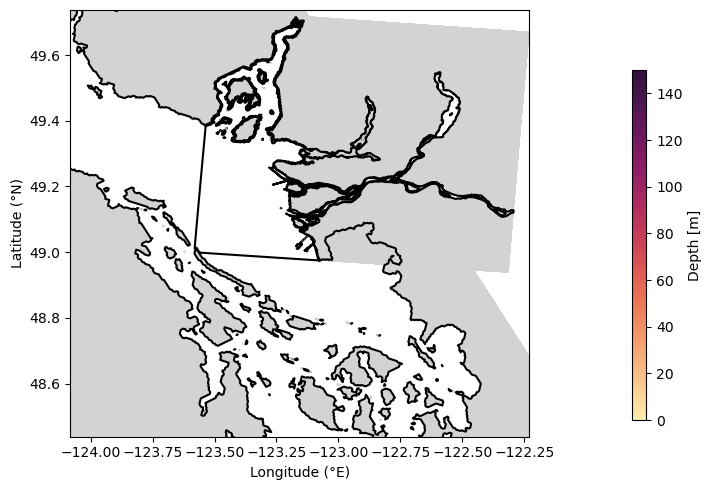

In [26]:
#Building animation
lat_ssc = ssc_mesh['nav_lat'].values
lon_ssc = ssc_mesh['nav_lon'].values
lat_sss150 = mesh['nav_lat'].values
lon_sss150 = mesh['nav_lon'].values

# Make initial animation figure
fig, ax = plt.subplots(figsize=(7, 5))
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# ax.contourf(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# Plot sss150 first with white water
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=2)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

# Plot ssc with lower zorder and transparency
ax.contourf(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=1)
ax.contour(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

l = ax.scatter([], [], s=20, c=[], vmin=0, vmax=150, edgecolor='k',cmap=cm.cm.matter)
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.set_xlim([lon_sss150.min()-0.5, lon_sss150.max()])
ax.set_ylim([lat_sss150.min()-0.5, lat_sss150.max()])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
# c = ax.contourf(
# mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
# cmap=cm.cm.gray_r, extend='max',zorder=0,
# )
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([TrajLonComb[hour,:], TrajLatComb[hour,:]]).T)
    l.set_array(TrajDepthComb[hour,:]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(sss150.nb_output)-1), interval=100, blit=True)

fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar

In [ ]:
HTML(anim.to_html5_video())

/tmp/ipykernel_1146288/1338212356.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar


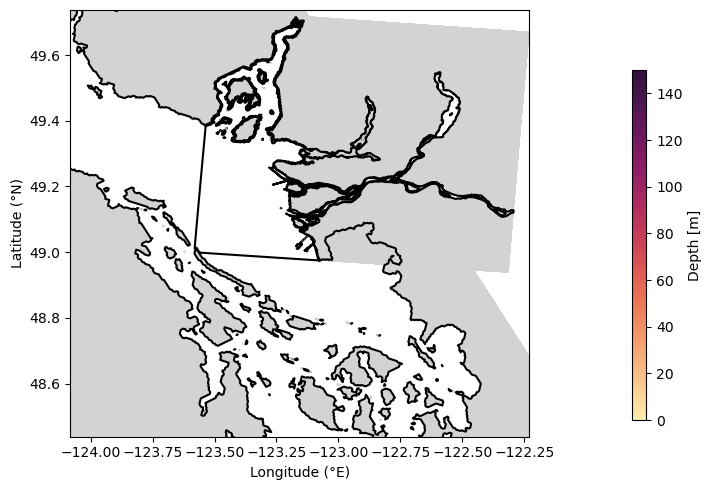

In [9]:
#Building animation
lat_ssc = ssc_mesh['nav_lat'].values
lon_ssc = ssc_mesh['nav_lon'].values
lat_sss150 = mesh['nav_lat'].values
lon_sss150 = mesh['nav_lon'].values

# Make initial animation figure
fig, ax = plt.subplots(figsize=(7, 5))
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# ax.contourf(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# Plot sss150 first with white water
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=2)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

# Plot ssc with lower zorder and transparency
ax.contourf(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=1)
ax.contour(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

l = ax.scatter([], [], s=20, c=[], vmin=0, vmax=150, edgecolor='k',cmap=cm.cm.matter)
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.set_xlim([lon_sss150.min()-0.5, lon_sss150.max()])
ax.set_ylim([lat_sss150.min()-0.5, lat_sss150.max()])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
# c = ax.contourf(
# mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
# cmap=cm.cm.gray_r, extend='max',zorder=0,
# )
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([TrajLonComb[hour,:10], TrajLatComb[hour,:10]]).T)
    l.set_array(TrajDepthComb[hour,:10]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(sss150.nb_output)-1), interval=100, blit=True)

fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar

In [10]:
HTML(anim.to_html5_video())

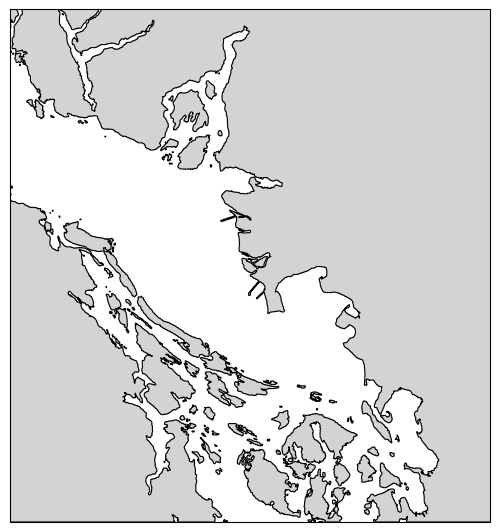

In [98]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [lon_sss150.min()-0.5, lon_sss150.max()], [lat_sss150.min()-0.5, lat_sss150.max()]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

data_crs = ccrs.PlateCarree()  
map_crs = crs.Mercator(np.mean(xlim), *ylim)  # Same as map projection

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='lightgray'),zorder=0)

l = ax.scatter([], [], s=30, c=[], vmin=0, vmax=150, edgecolor='k',cmap=cm.cm.matter,zorder=3)
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
fig.colorbar(l, cax=cax, label='Depth [m]')
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    transformed_points = map_crs.transform_points(data_crs, TrajLonComb[hour, :], TrajLatComb[hour, :])
    x = transformed_points[:, 0]  # Extract x-coordinates
    y = transformed_points[:, 1]  # Extract y-coordinates
    
    l.set_offsets(np.vstack([x, y]).T)  # Update scatter plot
    l.set_array(TrajDepthComb[hour, :] * -1)  # Keeping depth negative for color scaling
    # l.set_offsets(np.vstack([TrajLonComb[hour,:10], TrajLatComb[hour,:10]]).T)
    # l.set_array(TrajDepthComb[hour,:10]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(sss150.nb_output)-1), interval=100, blit=True)

fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar

In [99]:
HTML(anim.to_html5_video())